# Python manipulation
## Acquiring Data and Data Analysis Tools

In [1]:
#Importamos las librerias necesarias de Python.

import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import pathlib           as pl

In [2]:
#Encontramos el archivo correcto para el analisis. En este caso el código esta en la misma hubicación. 

directorio = pl.Path.cwd()
archivos = [archivo for archivo in directorio.iterdir() if archivo.is_file()]
for x in archivos:
    print(x)

C:\Users\Lenovo\Desktop\Portafolio trabajos\portafolio DATA ANALISIS\Clinical Dataset\Clinical Data_Discovery_Cohort.csv
C:\Users\Lenovo\Desktop\Portafolio trabajos\portafolio DATA ANALISIS\Clinical Dataset\Clinical_Data_Validation_Cohort.csv
C:\Users\Lenovo\Desktop\Portafolio trabajos\portafolio DATA ANALISIS\Clinical Dataset\Clinical_Data_Validation_Cohort.xlsx
C:\Users\Lenovo\Desktop\Portafolio trabajos\portafolio DATA ANALISIS\Clinical Dataset\Sobrevida.ipynb


## Data Cleaning

In [3]:
# Cargar el archivo en un Dataframe de pandas.
# En este caso el archivo es un csv. Se usa por tanto el metodo pandas.read_csv()
# Ya que los archivos estan en una lista, se puede usar el indice para acceder al archivo (archivos[0] en este caso)
# O usar el nombre del archivo en el directorio. Se usa Head(7) para ver solo un vistazo de la info cargada


df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Portafolio trabajos\portafolio DATA ANALISIS\Clinical Dataset\Clinical Data_Discovery_Cohort.csv")
df.head(7)

,PatientID,Specimen date,Dead or Alive,Date of Death,Date of Last Follow Up,sex,race,Stage,Event,Time
0,1,3/17/2003,Dead,2/24/2010,2/24/2010,F,B,pT2N2MX,1,2536
1,2,6/17/2003,Dead,11/12/2004,11/12/2004,M,W,T2N2MX,1,514
2,3,9/9/2003,Dead,8/1/2009,8/1/2009,F,B,T2N1MX,1,2153
3,4,10/14/2003,Dead,12/29/2006,12/29/2006,M,W,pT2NOMX,1,1172
4,5,12/1/2003,Dead,1/31/2004,1/31/2004,F,W,T2NOMX,1,61
5,6,3/8/2004,Alive,.,1/2/2013,M,W,pT2pN0,0,3222
6,7,3/16/2004,Dead,4/11/2006,4/11/2006,M,W,T1NOMX,1,756


In [4]:
# En este archivo con pocos registros se observó solo en la columna "Date of Death" fechas faltantes.
# que corresponden con las personas que siguen vivas, en archivos con más resgistros se deben buscar valores nulos,
# valores que no concuerden con el tipo de dato etc. Aqui sirve el codigo siguiente donde se observó que existian 9 registros
# con valor de "." (punto)

freq = df["Date of Death"].value_counts()
freq

.              9
2/24/2010      1
1/20/2015      1
9/9/2010       1
10/12/2011     1
12/31/2006     1
2/3/2008       1
12/12/2011     1
 06/04/2009    1
12/15/2005     1
10/2/2006      1
4/29/2007      1
11/12/2004     1
10/10/2004     1
7/26/2006      1
8/5/2004       1
3/13/2015      1
4/11/2006      1
1/31/2004      1
12/29/2006     1
8/1/2009       1
5/21/2006      1
Name: Date of Death, dtype: int64

In [5]:
# Para corregir los datos discrepantes. Se esperan fechas, se tienen cadenas de texto incluyendo el signo ortográfico "."
# primero cambiamos los "." por el valor abstracto "nulo"
# Se vuelven a mostrar 7 lineas de la BD, la 6ta, muestra el nuevo valor (los demas "." ahora tienen el mismo valor nulo"NaN")

df["Date of Death"].replace(".", np.nan, inplace = True)
df.head(7)

,PatientID,Specimen date,Dead or Alive,Date of Death,Date of Last Follow Up,sex,race,Stage,Event,Time
0,1,3/17/2003,Dead,2/24/2010,2/24/2010,F,B,pT2N2MX,1,2536
1,2,6/17/2003,Dead,11/12/2004,11/12/2004,M,W,T2N2MX,1,514
2,3,9/9/2003,Dead,8/1/2009,8/1/2009,F,B,T2N1MX,1,2153
3,4,10/14/2003,Dead,12/29/2006,12/29/2006,M,W,pT2NOMX,1,1172
4,5,12/1/2003,Dead,1/31/2004,1/31/2004,F,W,T2NOMX,1,61
5,6,3/8/2004,Alive,NaN,1/2/2013,M,W,pT2pN0,0,3222
6,7,3/16/2004,Dead,4/11/2006,4/11/2006,M,W,T1NOMX,1,756


## Data transforming

In [6]:
# Se convierten las cadenas de texto a fecha, las 3 columnas con fechas son las siguiente:
# Mostrar 7 registros de la BD, los valores nulos cambiaron a "NaT" 
# Se muestra la fecha con formato "aaaa-mm-dd"

df["Specimen date"]          = pd.to_datetime(df["Specimen date"])
df["Date of Death"]          = pd.to_datetime(df["Date of Death"])
df["Date of Last Follow Up"] = pd.to_datetime(df["Date of Last Follow Up"])
df.head(7)

,PatientID,Specimen date,Dead or Alive,Date of Death,Date of Last Follow Up,sex,race,Stage,Event,Time
0,1,2003-03-17,Dead,2010-02-24,2010-02-24,F,B,pT2N2MX,1,2536
1,2,2003-06-17,Dead,2004-11-12,2004-11-12,M,W,T2N2MX,1,514
2,3,2003-09-09,Dead,2009-08-01,2009-08-01,F,B,T2N1MX,1,2153
3,4,2003-10-14,Dead,2006-12-29,2006-12-29,M,W,pT2NOMX,1,1172
4,5,2003-12-01,Dead,2004-01-31,2004-01-31,F,W,T2NOMX,1,61
5,6,2004-03-08,Alive,NaT,2013-01-02,M,W,pT2pN0,0,3222
6,7,2004-03-16,Dead,2006-04-11,2006-04-11,M,W,T1NOMX,1,756


In [7]:
# A primera vista la "Date of Last Follow up" es igual a la "Date of Death", exceptuando a los "Alive".
# Se puede verificar revisando si el dato en el registro es igual en ambas columnas.

#agregamos una nueva columna provisional para esta tarea al final de la base (ultima columna)

df["verif"] = df["Date of Death"] == df["Date of Last Follow Up"]
df.head(7)

,PatientID,Specimen date,Dead or Alive,Date of Death,Date of Last Follow Up,sex,race,Stage,Event,Time,verif
0,1,2003-03-17,Dead,2010-02-24,2010-02-24,F,B,pT2N2MX,1,2536,True
1,2,2003-06-17,Dead,2004-11-12,2004-11-12,M,W,T2N2MX,1,514,True
2,3,2003-09-09,Dead,2009-08-01,2009-08-01,F,B,T2N1MX,1,2153,True
3,4,2003-10-14,Dead,2006-12-29,2006-12-29,M,W,pT2NOMX,1,1172,True
4,5,2003-12-01,Dead,2004-01-31,2004-01-31,F,W,T2NOMX,1,61,True
5,6,2004-03-08,Alive,NaT,2013-01-02,M,W,pT2pN0,0,3222,False
6,7,2004-03-16,Dead,2006-04-11,2006-04-11,M,W,T1NOMX,1,756,True


In [8]:
# extraemos solo los datos donde las fechas de muerte y ultimo seguimiento sean diferentes
# si revisamos los valores unicos en la columna "Dead or Alive", esperamos 1 solo valor "Alive", que son las personas
# a las que las fechas mencionadas son diferentes.
# si se encuentran valores "Dead" y "Alive", significa que hay personas que su fecha de muerte no habia sido el último seg.
diferencias = df[df["verif"]==False]
diferencias["Dead or Alive"].unique()

array(['Alive'], dtype=object)

In [9]:
# Sin documentación de la BD original, se presupuso que la columna "Time" representa los dias de supervivencia desde el
# descubrimiento de la enfermedad, para corroborar se debe verificar que el valor en "Time" sea identico a los dias
# transcurridos desde "Specimen date" hasta la fecha de muerte. Sin embargo al tener pacientes vivos, se usa la columna
# "Date of Last Follow up" para encontrar la supervivencia. Usamos la misma columna provisional previa.

df["verif"] = df["Date of Last Follow Up"]-df["Specimen date"]
df.head(7)

,PatientID,Specimen date,Dead or Alive,Date of Death,Date of Last Follow Up,sex,race,Stage,Event,Time,verif
0,1,2003-03-17,Dead,2010-02-24,2010-02-24,F,B,pT2N2MX,1,2536,2536 days
1,2,2003-06-17,Dead,2004-11-12,2004-11-12,M,W,T2N2MX,1,514,514 days
2,3,2003-09-09,Dead,2009-08-01,2009-08-01,F,B,T2N1MX,1,2153,2153 days
3,4,2003-10-14,Dead,2006-12-29,2006-12-29,M,W,pT2NOMX,1,1172,1172 days
4,5,2003-12-01,Dead,2004-01-31,2004-01-31,F,W,T2NOMX,1,61,61 days
5,6,2004-03-08,Alive,NaT,2013-01-02,M,W,pT2pN0,0,3222,3222 days
6,7,2004-03-16,Dead,2006-04-11,2006-04-11,M,W,T1NOMX,1,756,756 days


In [10]:
# Dado que concuerdan los datos, ya no es necesaria la columna de verificación. Se elimina de la BD

del df["verif"]
df.head(3)

,PatientID,Specimen date,Dead or Alive,Date of Death,Date of Last Follow Up,sex,race,Stage,Event,Time
0,1,2003-03-17,Dead,2010-02-24,2010-02-24,F,B,pT2N2MX,1,2536
1,2,2003-06-17,Dead,2004-11-12,2004-11-12,M,W,T2N2MX,1,514
2,3,2003-09-09,Dead,2009-08-01,2009-08-01,F,B,T2N1MX,1,2153


# Data exploratory Analysis

### * Grouping data
### * Data visualization

In [11]:
# Con la base ya limpia se empiezan a buscar las agrupaciones correctas para la visualización posterior


In [12]:
# Se deberán hacer agrupaciones exploratorias para despues profundizar en la visualización.

In [13]:
# Veamos primero la cantidad de personas que sobrevivieron y las que murieron, usamos por ello la agrupación del conteo
# por el estado "Dead or Alive", aplicado a ID del paciente que es único por persona.
# En este punto solo es la cantidad de pacientes vivos Vs muertos en toda la BD, sin importar las demas variables

dead_rate = df.groupby(by="Dead or Alive")["PatientID"].count()
d_r_100 = pd.DataFrame({
    "Pacientes" : dead_rate,
    "Porcentaje": dead_rate / dead_rate.sum()*100
                       })
d_r_100

,Pacientes,Porcentaje
Dead or Alive,,
Alive,9,30.0
Dead,21,70.0


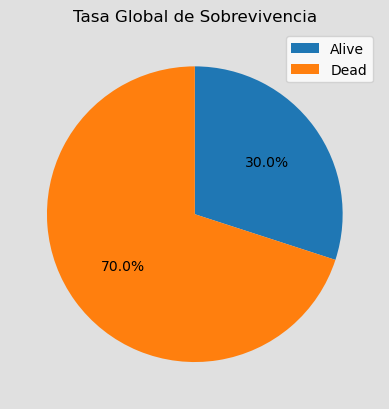

In [14]:
# Al corresponder con categorias, la representación  que se adecua es un gráfico circular.
# Se utilizan los porcentajes calculados, con el valor en porcentaje incluido
# y las leyendas de las correspondencias de las categorias incluidas. Se puede utilizar la imagen para otras tareas o exportar.

graph_dead_rate = d_r_100["Porcentaje"]
plt.figure(facecolor='#E0E0E0')

plt.pie(
    graph_dead_rate,
    #labels= d_r_100.index.values,
    autopct= "%1.1f%%",
    startangle = 90,
    counterclock = False,
)

plt.legend(labels = d_r_100.index.values, loc = 1)

plt.title(label = "Tasa Global de Sobrevivencia")              
plt.show()

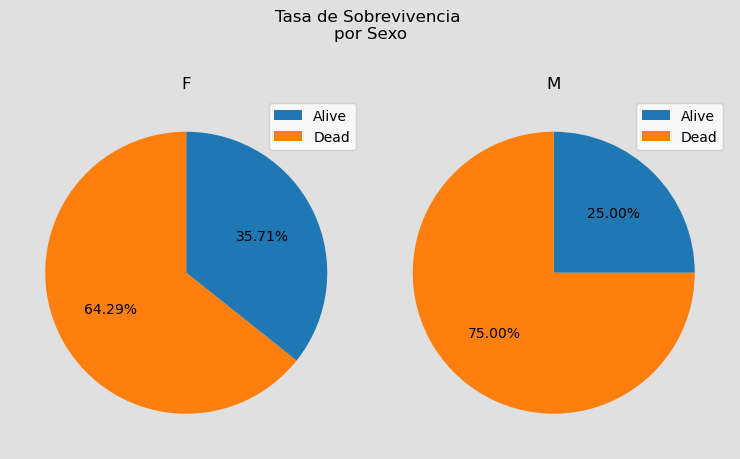

In [15]:
# Para analizar mejor la segmentación de los datos, se construye la misma gráfica de supervivencia anterior, segmentada por sexo

# Crear una nueva Figura con una cuadrícula 1 fila x 2 columnas para subgráficas
fig, axs = plt.subplots(1, 2, figsize =(7.5,5))

# Crea un conjunto con el conteo de los pacientes agrupados por sexo y condicion (Alive-Dead)
mean_dead = df.groupby(by = ["sex","Dead or Alive"])["PatientID"].count().unstack()

#Estilo similar al gráfico anterior
fig.set_facecolor('#E0E0E0')


# Trazar los datos en cada subgráfico
for i, ax in enumerate(axs.flatten()):
    fig.suptitle("Tasa de Sobrevivencia \npor Sexo")
    ax.pie(mean_dead.iloc[i],
    autopct= "%1.2f%%",
    startangle = 90,
    counterclock = False,
          )
    ax.set_title(mean_dead.index.values[i])
    ax.legend(labels = mean_dead.columns.values, loc =1 )
    
    plt.tight_layout()


In [16]:
# La distribución de los pacientes en el tiempo de sobrevida es lo siguiente a considerar:
# sabemos que el promedio de sobrevivencia por sexo, es obtenido por el siguiente codigo.
# que agrupa el promedio de sobrevida (Time), por el sexo del paciente y su estatus. Dato expresado en días.

mean_live = round(df.groupby(by = ["sex", "Dead or Alive"])["Time"].mean().unstack(),2)
mean_live




Dead or Alive,Alive,Dead
sex,,
F,3643.20,1314.78
M,1438.25,1111.42


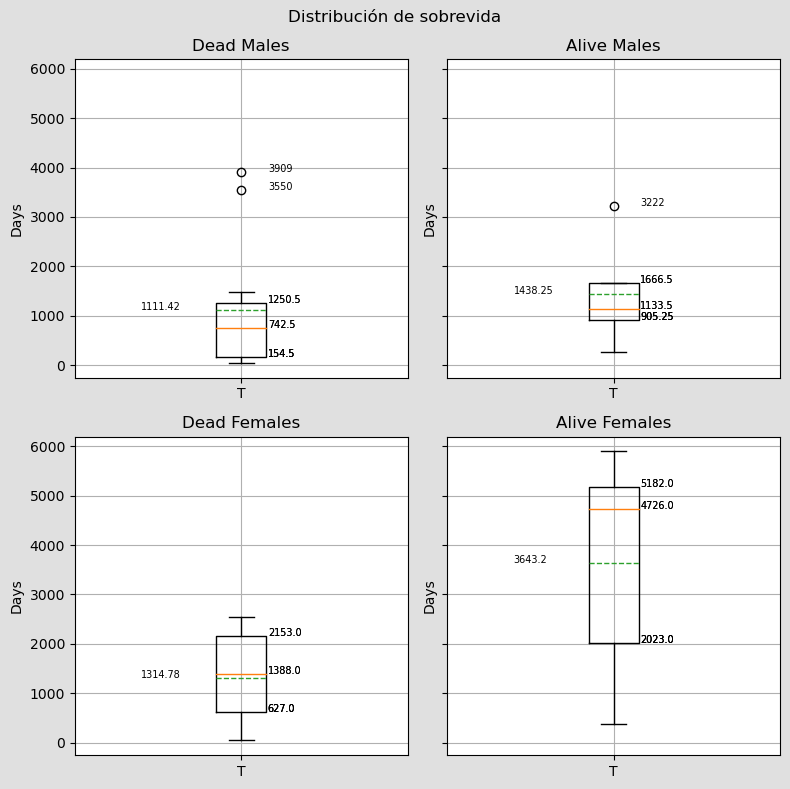

In [17]:
# Sobre este promedio se puede observar claramente que el tiempo promedio de sobrevida en mujeres que viven
# es mucho mayor que el de hombres. Al igual que en el caso de pacientes muertos, donde las mujeres tienen una supervivencia
# promedio, de cerca de 200 días mas que los hombres.

# Por ello puede ser interesante observar la distribucion de la sobrevida de los pacientes de acuerdo a su estatus y tiempos.

MD = df.loc[(df["Dead or Alive"] == "Dead")&(df["sex"]=="M")]
MA = df.loc[(df["Dead or Alive"] == "Alive")&(df["sex"]=="M")]
FD = df.loc[(df["Dead or Alive"] == "Dead")&(df["sex"]=="F")]
FA = df.loc[(df["Dead or Alive"] == "Alive")&(df["sex"]=="F")]

surv_data = [MD,MA,FD,FA]
graph_title = {0:"Dead Males", 1:"Alive Males", 2:"Dead Females", 3:"Alive Females"}
keys_to_retrieve = ["fliers","boxes","medians","means"]

fig2, axs2 = plt.subplots(2, 2, figsize =(8,8),sharey =True)
fig2.set_facecolor('#E0E0E0')

for i, ax in enumerate(axs2.flatten()):
    fig2.suptitle("Distribución de sobrevida")
    graph = ax.boxplot(
        surv_data[i]["Time"],
        labels = "T",
        meanline = True,
        showmeans = True
        )
    ax.set_ylabel("Days")
    ax.grid()
    ax.set_title(graph_title[i])

    i = 0
    for key in keys_to_retrieve:
        for linea in graph[key]:
            y = linea.get_ydata()
            for data in y:
                if key == "means":
                    ax.text(0.7,data,round(data,2),fontsize = 7)
                    break
                else:
                    ax.text(1.08,data,round(data,2),fontsize = 7)

                i = i + 1
    plt.tight_layout()


## De los gráficos anteriores podemos observar que:


### *En los pacientes masculinos que están muertos, se tienen dos personas con tiempos de sobrevida atípicos.
### *En los pacientes masculinos que están vivos, existe un valor atípico de prácticamente el doble del segundo mas alto
### *En los pacientes femeninos que están vivas, el rango de sobrevivencia es muy amplio. Llegando hasta casi los 6000 días



### *Los resultados obtenidos muy probablemente estan sesgados por los pocos registros que componenen la BD*

<br>
<br>
<br>
<br>

## Estado de los pacientes de acuerdo al tipo de tumoración:


### Agrupación por el estadio del tumor y el estatus del paciente.

In [18]:
# Agrupacion de datos:
tumor_type = df.groupby(by = ["Stage","Dead or Alive"])["PatientID"].count().unstack()

# Corrección de los datos vacios o incompletos, cambiando por valor 0 aquellos que no tuvieran un conteo (NaN)
tumor_type.fillna(0, inplace = True)

tumor_type

Dead or Alive,Alive,Dead
Stage,,
pT3N0Mx,1.0,0.0
PT1PN0,1.0,4.0
PT2PN0,2.0,1.0
PT2PN1,0.0,1.0
PT3PN0,0.0,1.0
PT4PN1,0.0,1.0
T1N0,1.0,2.0
T1NOMX,0.0,1.0
T2N0,3.0,4.0


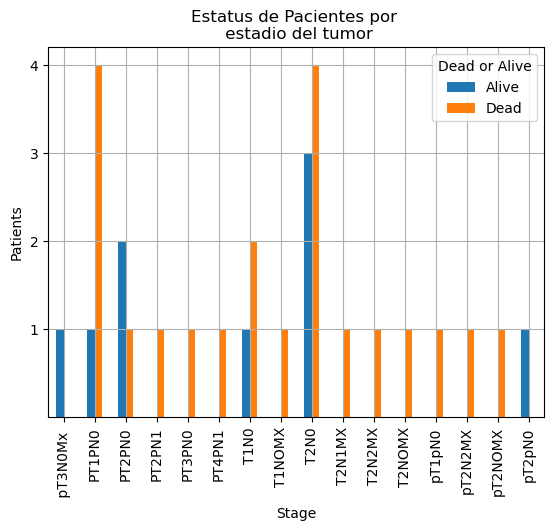

In [19]:
state_by_TT = tumor_type.plot(kind= "bar",
                             title = "Estatus de Pacientes por \n estadio del tumor",
                              grid = True,
                             yticks = range(1,5),
                             xlabel = "Stage",
                             ylabel = "Patients")
plt.show()

*Podemos observar desde la tabla de datos que el estadio de tumoración mas habitual en esta BD es el ***T2N0*** <br> con 7
pacientes en total. Seguido de ***PT1PN0*** con 5 pacientes.*

<br>
<br>
El análisis posterior podria incluir diferentes bases de datos, que complementen la información aqui encontrada.
